In [1]:
from scipy import stats

# sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('../spaceship_titanic/raw_data/train.csv')

In [3]:
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Preprocessing

In [4]:
data_train.shape

(8693, 14)

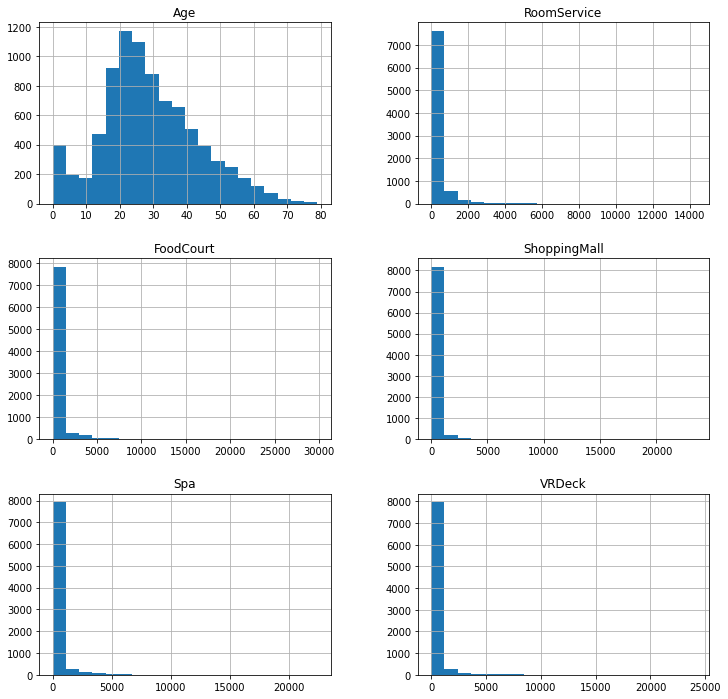

In [5]:

data_train.hist(figsize = (12,12),bins = 20);

In [6]:
data_train.dtypes.value_counts()

object     7
float64    6
bool       1
dtype: int64

In [7]:
data_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [8]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Feature Engineering

In [39]:
from sklearn.base import TransformerMixin, BaseEstimator

class MyCustomTranformer(TransformerMixin, BaseEstimator): 
    # BaseEstimator generates the get_params() and set_params() methods that all Pipelines require
    # TransformerMixin creates the fit_transform() method from fit() and transform()
    
    def __init__(self,df):
        self.df = df
        
    
    def fit(self, y=None):
        # Here you store what needs to be stored during .fit(X_train) as instance attributes
        # Return "self" to allow chaining .fit().transform()
        return self
    
    def transform(self, y=None):
        # Return result as a DataFrame for integration into ColumnTransformer
        self.df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = self.df['Cabin'].str.split('/', expand=True)
        self.df = self.df.drop(columns = 'Cabin')
        self.df.Cabin_num = self.df.Cabin_num.astype(float)
        self.df['RoomService'] = np.where(self.df['Age'] < 13, 0, self.df['RoomService'])
        self.df['FoodCourt'] = np.where(self.df['Age'] < 13, 0, self.df['FoodCourt'])
        self.df['ShoppingMall'] = np.where(self.df['Age'] < 13, 0, self.df['ShoppingMall'])
        self.df['Spa'] = np.where(self.df['Age'] < 13, 0, self.df['Spa'])
        self.df['VRDeck'] = np.where(self.df['Age'] < 13, 0, self.df['VRDeck'])
    
        return self.df

In [40]:
x = MyCustomTranformer(data_train)

In [41]:
x

MyCustomTranformer(df=     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Canc...
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported Cabin_deck Cabin_num Cabin_side  
0           False          B         0          P  
1            True          F         0          S  
2           False          A         0          S  
3           False          A         0          S  
4            True          F         1          S  
...           ...        ...       ...        ...  
8688        False          A        98          P  
8689        False          G      1499          S  
8690         True          G      1500          S  
8691        False          E       608          S  
8692         True          E       608          S  

[8693 rows x 17 columns])

In [42]:
x_transform =pd.DataFrame(x.fit_transform(data_train))

In [59]:
x_transform = x_transform.drop(columns = 'Transported')

In [60]:
x_transform.shape

(8693, 15)

In [61]:
Pipeline([('custom',MyCustomTranformer(data_train))])

Pipeline(steps=[('custom',
                 MyCustomTranformer(df=     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276...
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported Cabin_deck Cabin_num Cabin_side  
0           False          B         0          P  
1            True          F         0          S  
2           False          A         0          S  
3           False          A         0          S  
4            True          F         1          S  
...           ...        ...       ...        ...  
8688        False          A        98          P  
8689        False          G      1499          S  
8690         True          G      1500          S  
8691        False          E       608          S  
8692         True          E       608          S  

[8693 rows x 17 columns]))])

In [62]:
preproc_numerical = make_pipeline(
SimpleImputer(strategy='median'),
StandardScaler())

preproc_categorical = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown="ignore"))

cat_types = x_transform.select_dtypes(include='object').nunique()
cat_types_small =  list(cat_types[cat_types < 10].index)

preproc= make_column_transformer(
(preproc_numerical, make_column_selector(dtype_include=['float64','int64'])),
(preproc_categorical, cat_types_small),
remainder="drop")


In [63]:
preproc

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x168a4c6a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'Cabin_deck', 'Cabin_side'])])

In [64]:
X_trian = preproc.fit_transform(x_transform)

In [65]:
X_trian.shape

(8693, 27)

In [66]:
X_trian

array([[ 0.71194537, -0.33310466, -0.28102673, ...,  0.        ,
         1.        ,  0.        ],
       [-0.33403748, -0.16807343, -0.27538657, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.03685698, -0.2680006 ,  1.95999765, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1945731 , -0.33310466, -0.28102673, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.22382004, -0.33310466,  0.37636549, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.06060632, -0.14233462,  2.656871  , ...,  0.        ,
         0.        ,  1.        ]])

In [67]:
y_train = data_train.Transported

# Model 

In [176]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers, Sequential, layers
import matplotlib.pyplot as plt

In [177]:
es = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [178]:
reg_l1 = regularizers.L1(0.01)
reg_l2 = regularizers.L2(0.01)
reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

In [179]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=X_trian.shape[1]))
model.add(keras.layers.Dense(30, activation='relu',kernel_regularizer=reg_l1))
# model.add(keras.layers.Dense(10, activation='tanh',kernel_regularizer=reg_l1))

model.add(keras.layers.Dense(30, activation='relu',bias_regularizer=reg_l2))
# model.add(keras.layers.Dense(10, activation='tanh',bias_regularizer=reg_l2))

model.add(keras.layers.Dense(20, activation='relu',activity_regularizer=reg_l1_l2))
model.add(keras.layers.Dense(20, activation='tanh',activity_regularizer=reg_l1_l2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss ="binary_crossentropy", optimizer=opt, metrics=['accuracy'])

In [180]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 30)                840       
_________________________________________________________________
dense_69 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_70 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_71 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 21        
Total params: 2,831
Trainable params: 2,831
Non-trainable params: 0
_________________________________________________________________


In [182]:
history = model.fit(X_trian,
                    y_train,
                    epochs=50,
                    batch_size = 64,
                    shuffle = True,
                    validation_split=0.3,
                    verbose=1, 
                    callbacks=[es])

Epoch 1/50
96/96 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.7979 - val_loss: 0.5262 - val_accuracy: 0.7818
Epoch 2/50
96/96 [==============================] - 0s 965us/step - loss: 0.4423 - accuracy: 0.8066 - val_loss: 0.5461 - val_accuracy: 0.7818
Epoch 3/50
96/96 [==============================] - 0s 959us/step - loss: 0.4373 - accuracy: 0.8108 - val_loss: 0.5528 - val_accuracy: 0.7830
Epoch 4/50
96/96 [==============================] - 0s 956us/step - loss: 0.4409 - accuracy: 0.8023 - val_loss: 0.5602 - val_accuracy: 0.7880
Epoch 5/50
96/96 [==============================] - 0s 949us/step - loss: 0.4330 - accuracy: 0.8104 - val_loss: 0.6783 - val_accuracy: 0.7473
Epoch 6/50
96/96 [==============================] - 0s 972us/step - loss: 0.4312 - accuracy: 0.8107 - val_loss: 0.5337 - val_accuracy: 0.7811
Epoch 7/50
96/96 [==============================] - 0s 962us/step - loss: 0.4329 - accuracy: 0.8076 - val_loss: 0.5402 - val_accuracy: 0.7895
Epoch 8/

In [183]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # --- LOSS --- 
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylim((0,3))
    ax[0].legend(['Train', 'Val'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- ACCURACY
    
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Val'], loc='best')
    ax[1].set_ylim((0,1))
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
    
    if title:
        fig.suptitle(title)

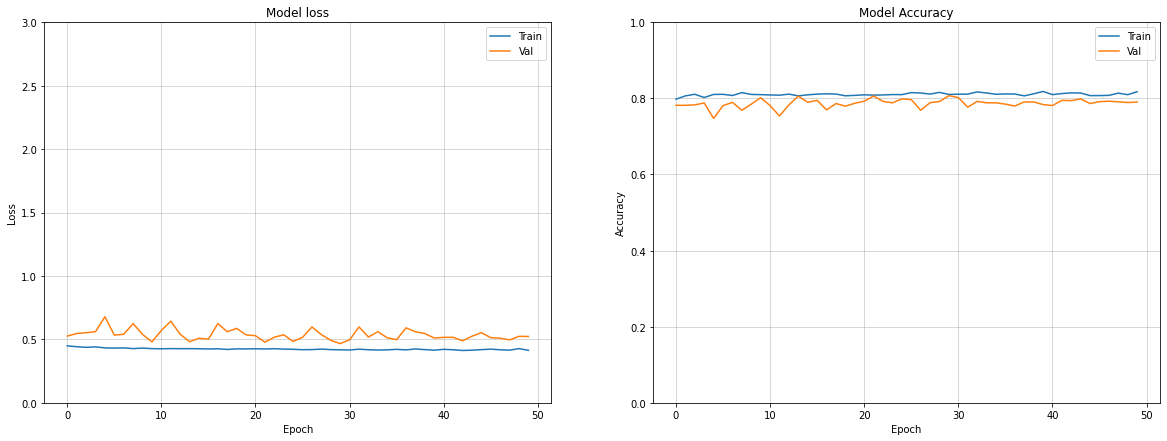

In [184]:
plot_loss_accuracy(history, title=None)

# Predict the test 

In [185]:
test_data = pd.read_csv('../spaceship_titanic/raw_data/test.csv')

In [186]:
x_test = MyCustomTranformer(test_data)

In [187]:
x_transform_test =pd.DataFrame(x_test.fit_transform(test_data))

In [188]:
X_test = preproc.fit_transform(x_transform_test)

In [189]:
predictions = model.predict(X_test).round().astype(bool)

In [190]:
output = pd.DataFrame(predictions, columns=['Transported'])
output.insert(0,'PassengerId',test_data['PassengerId'])

In [191]:
output.shape

(4277, 2)

In [192]:
output.to_csv("../spaceship_titanic/raw_data/submission_baseline18.csv", header=True, index=False)